# Simple Linear Regression

## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

for column in train_data.columns:
    if train_data[column].dtype == 'object':
        # Fill missing values with the mode for categorical features
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        # Fill missing values with the mean for numeric features
        train_data[column].fillna(train_data[column].mean(), inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(), inplace=True)

# Select features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X = train_data[features]
y = train_data['SalePrice']

<ipython-input-2-099f57cf8cc7>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mean(), inplace=True)
<ipython-input-2-099f57cf8cc7>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Simple Linear Regression model on the Training set

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Visualising the Test set results

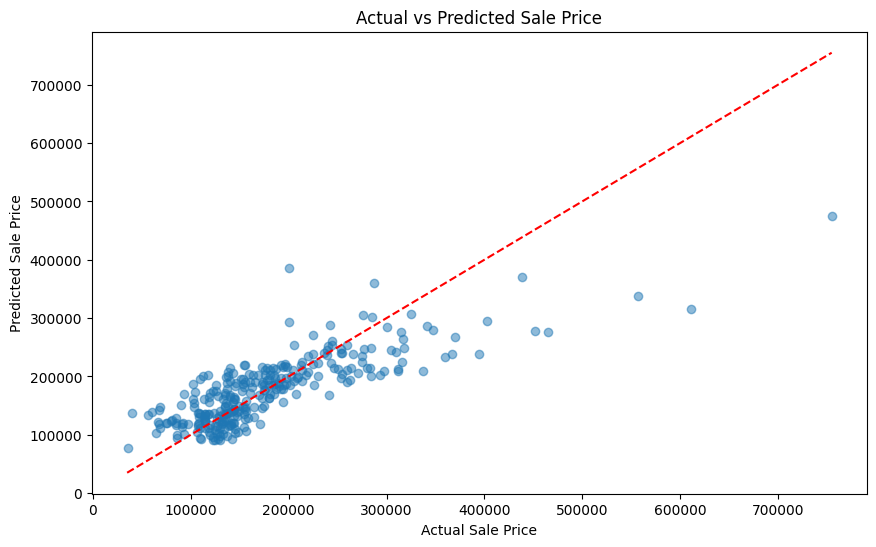

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

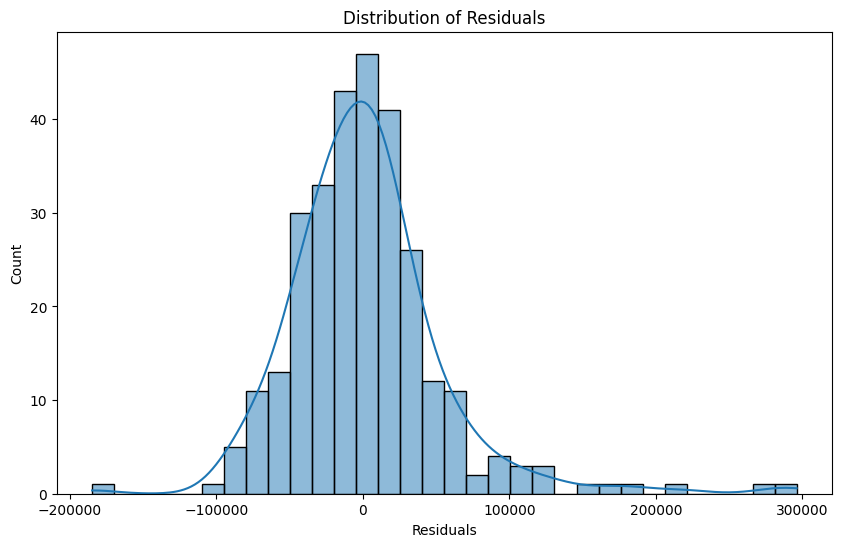

In [18]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [21]:
example = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})
example_prediction = regressor.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

# Prepare the test data and make predictions
X_test = test_data[features]
test_predictions = regressor.predict(X_test)

# Save predictions
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

Example Prediction: $240,896.28
